# MALIGNANT COMMENTS CLASSIFICATION

## INTRODUCTION

##### The conversational  of social media is an issue that can lead people both to stop genuinely expressing themselves and to stop seeking others opinions out of fear of abuse and harassment. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users.
##### There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms
##### The goal of this project will be use to identify comments in text, which could be used to help deter users from posting potentially hurtful messages, craft more civil arguments when  engaging  in discourse with others, and to gauge the other users comments.
##### There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms.
##### Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms.
##### My goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.


In [1]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/2000/1*UTduqxzY8oZjGmQ2ngFMfg.png")

## Libraries

In [2]:
pip install stopwords

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Sunil' is not recognized as an internal or external command,
operable program or batch file.


#### Importing all the libraries in one go so that it will be easy for me to do better Visualizations & Model Predictions.

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,roc_curve, roc_auc_score,plot_roc_curve

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


# EDA - Exploratory Data Analysis

## Loading the Dataset

In [5]:
df = pd.read_csv('train.csv')
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


#### By Loading Maginant Classifier dataset  I got the idea about the head of the Project. 

In [6]:
df.shape

(159571, 8)

#### By using shape I understand that in this dataset there are 159571 rows & 8 columns.

In [7]:
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


#### From the above coding in this dataset I can see that all the columns counts are matching.

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.shape

(159571, 8)

#### Here is no Duplicates in this Dataset.

In [10]:
df.nunique()

id                  159571
comment_text        159571
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

#### From the above code I can see there are 2 Continious & 6 Categorical Columns.

In [11]:
df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### From this Describe Column I can see there is a difference between mean and 50% value in some of the columns which used to get fix for better prediction.

#### Also, the mean and 50% value of most of the column are not same and the STD and mean have a major differnce to each othe

# Data Visualizations

### Donut,Pie charts and Count Plot

## Donut charts
#### A donut chart is almost identical to a pie chart, but the center is cut out (hence the name 'donut'). 
#### Donut charts are also used to show proportions of categories that make up the whole, but the center can also be used to display data.

## Pie charts
#### Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. 
#### Unlike bar graphs and line graphs, pie charts do not show changes over time.

## Count Plot
##### Count Plot is used to Show the counts of observations in each categorical bin using bars.
##### To create a horizontal bar chart or countplot in Seaborn, 
##### you simply map your categorical variable to the y-axis (instead of the x-axis). 
##### When you map the categorical variable to the y-axis, Seaborn will automatically create a horizontal countplot.

## malignant

In [12]:
df['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

#### Donut charts

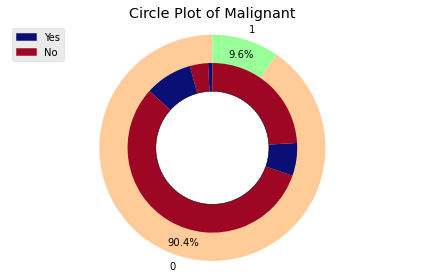

In [14]:
labels = ['0', '1']
sizes = [144277, 15294]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['#ffcc99', '#99ff99']

colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723']
 
# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.title('Circle Plot of Malignant')
plt.tight_layout()
plt.show()

#### From this Donut Charts it shows 90.4% people gives malignant comments in online Platform which is very harmful for the society.

#### pie plot

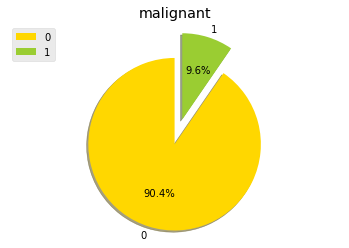

In [12]:
#  pie plot of malignant 

labels = ['0', '1']
value = [144277, 15294]
colors = ['gold','yellowgreen']
explode = [0.3,0]# 

plt.style.use('ggplot')
plt.title('malignant')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### From the Pie Plots  I can visualize that values depicting 90.4% which comments are malignant in nature.

#### Count Plot

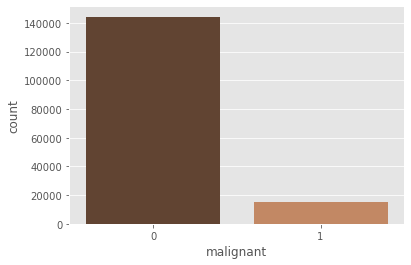

In [18]:
sns.countplot(df['malignant'],palette='copper', data = df);

#### Count Plot Defines 90.4% peoples in social media gives harsh comments which effects the individuals. 

## highly_malignant

In [19]:
df['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

#### Donut charts

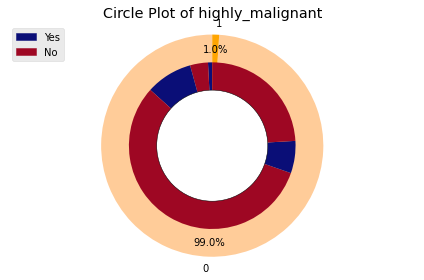

In [20]:
labels = ['0', '1']
sizes = [157976, 1595]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['#ffcc99', 'orange']

colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723']
 
# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.title('Circle Plot of highly_malignant')
plt.tight_layout()
plt.show()

#### From this Donnt chart it shows mostly comments are highly malignant text with 99.0% ratio. 

#### pie plot

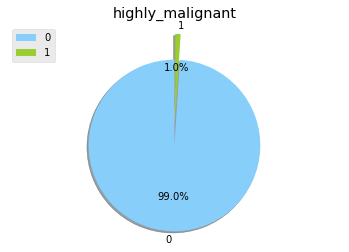

In [21]:
#  pie plot of highly_malignant 

labels = ['0', '1']
value = [157976, 1595]
colors = ['lightskyblue','yellowgreen']
explode = [0.3,0]# 

plt.style.use('ggplot')
plt.title('highly_malignant')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### There from this Pie Plot I can say in social media most comments are highly malignant text with 99.0%. 

#### Count Plot

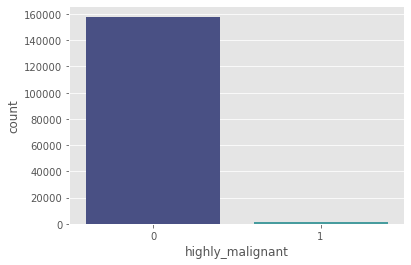

In [22]:
sns.countplot(df['highly_malignant'],palette='mako', data = df);

#### From the Count Plots  I can visualize the values depicting 99.0% highly malignant text.

## rude

In [23]:
df['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

#### Donut charts

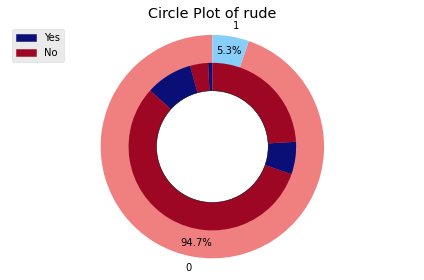

In [24]:
labels = ['0', '1']
sizes = [151122, 8449]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['lightcoral', 'lightskyblue']

colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723']
 
# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.title('Circle Plot of rude')
plt.tight_layout()
plt.show()

#### pie plot

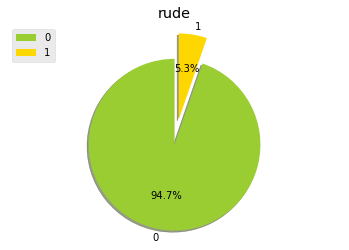

In [26]:
#  pie plot of rude 

labels = ['0', '1']
value = [151122, 8449]
colors = ['yellowgreen','gold']
explode = [0.3,0]# 

plt.style.use('ggplot')
plt.title('rude')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### CountPlot

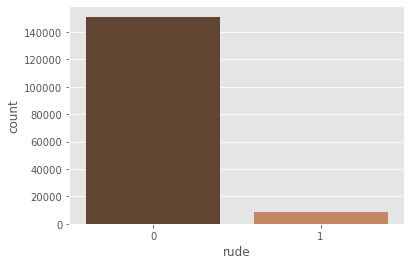

In [28]:
sns.countplot(df['rude'],palette='copper', data = df);

#### From the Above Plots & Charts I can visualize the values depicting 94.7% for comments that are rude in nature.

## threat

In [29]:
df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

#### Donut charts

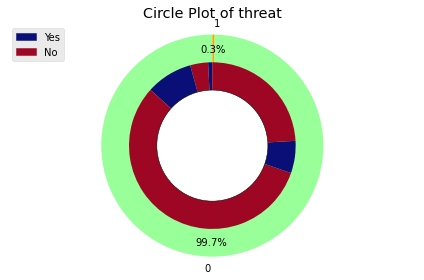

In [30]:
labels = ['0', '1']
sizes = [159093, 478]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['#99ff99', 'orange']

colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723']
 
# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.title('Circle Plot of threat')
plt.tight_layout()
plt.show()

### pie plot

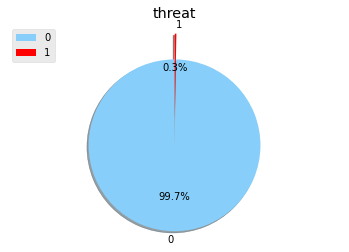

In [33]:
#  pie plot of threat 

labels = ['0', '1']
value = [159093, 478]
colors = ['lightskyblue','red']
explode = [0.3,0]# 

plt.style.use('ggplot')
plt.title('threat')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### Count Plot

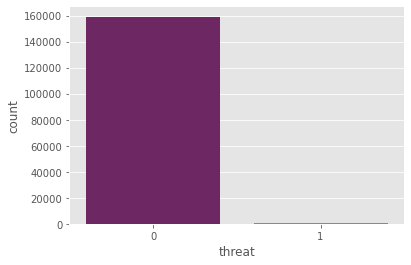

In [35]:
sns.countplot(df['threat'],palette='inferno', data = df);

#### From the Above Plots & Charts I can visualize the values depicting 99.7% for threatening context in the comments.

## abuse

In [36]:
df['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

#### Donut charts

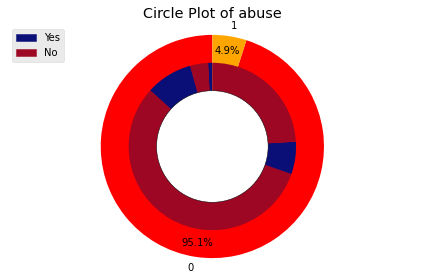

In [38]:
labels = ['0', '1']
sizes = [151694, 7877]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['red', 'orange']

colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723']
 
# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.title('Circle Plot of abuse')
plt.tight_layout()
plt.show()

#### pie plot

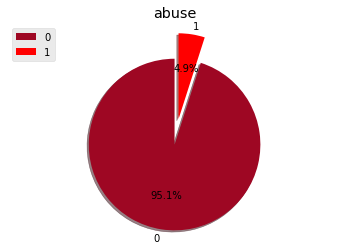

In [40]:
#  pie plot of abuse 

labels = ['0', '1']
value = [151694, 7877]
colors = ['#9e0723','red']
explode = [0.3,0]# 

plt.style.use('ggplot')
plt.title('abuse')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### Count Plot

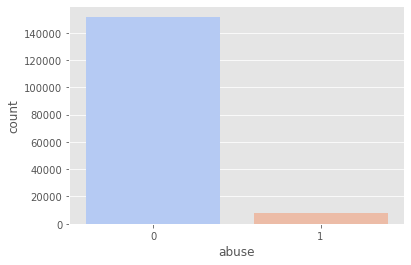

In [41]:
sns.countplot(df['abuse'],palette='coolwarm', data = df);

#### From the Above Plots & Charts I can visualize the values depicting 95.1% with abusive behaviour.

## loathe

In [42]:
df['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

#### Donut charts

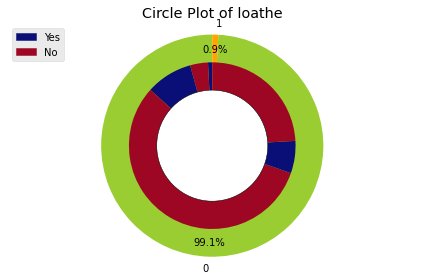

In [44]:
labels = ['0', '1']
sizes = [158166, 1405]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['yellowgreen', 'orange']

colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723']
 
# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.title('Circle Plot of loathe')
plt.tight_layout()
plt.show()

#### pie plot

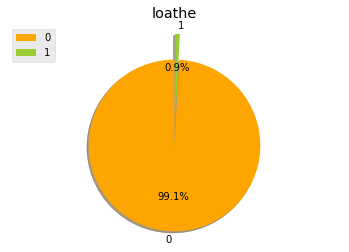

In [47]:
#  pie plot of loathe 

labels = ['0', '1']
value = [158166, 1405]
colors = ['orange','yellowgreen']
explode = [0.3,0]# 

plt.style.use('ggplot')
plt.title('loathe')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### Count Plot

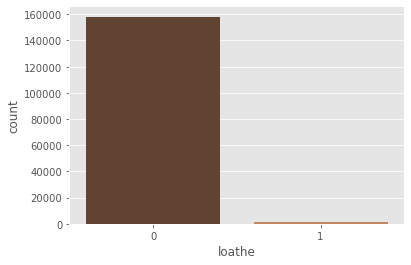

In [48]:
sns.countplot(df['loathe'],palette='copper', data = df);

#### From the Above Plots & Charts I can visualize the values depicting 99.1% are full of loathe and hatred.

## Correlation

#### Correlation explains how one or more variables are related to each other. 
#### These variables can be input data features which have been used to forecast our target variable.
#### Correlation, statistical technique which determines how one variables moves/changes in relation with the other variable. 
#### It gives us the idea about the degree of the relationship of the two variables. 
#### It’s a bi-variate analysis measure which describes the association between different variables. 
#### In most of the business it’s useful to express one subject in terms of its relationship with others.

In [13]:
df.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


# HeatMap

#### Heatmap is a way to show some sort of matrix plot. 
#### To use a heatmap the data should be in a matrix form. 
#### By matrix we mean that the index name and the column name must match in some way so that the data that we fill inside the cells are relevant.

[]

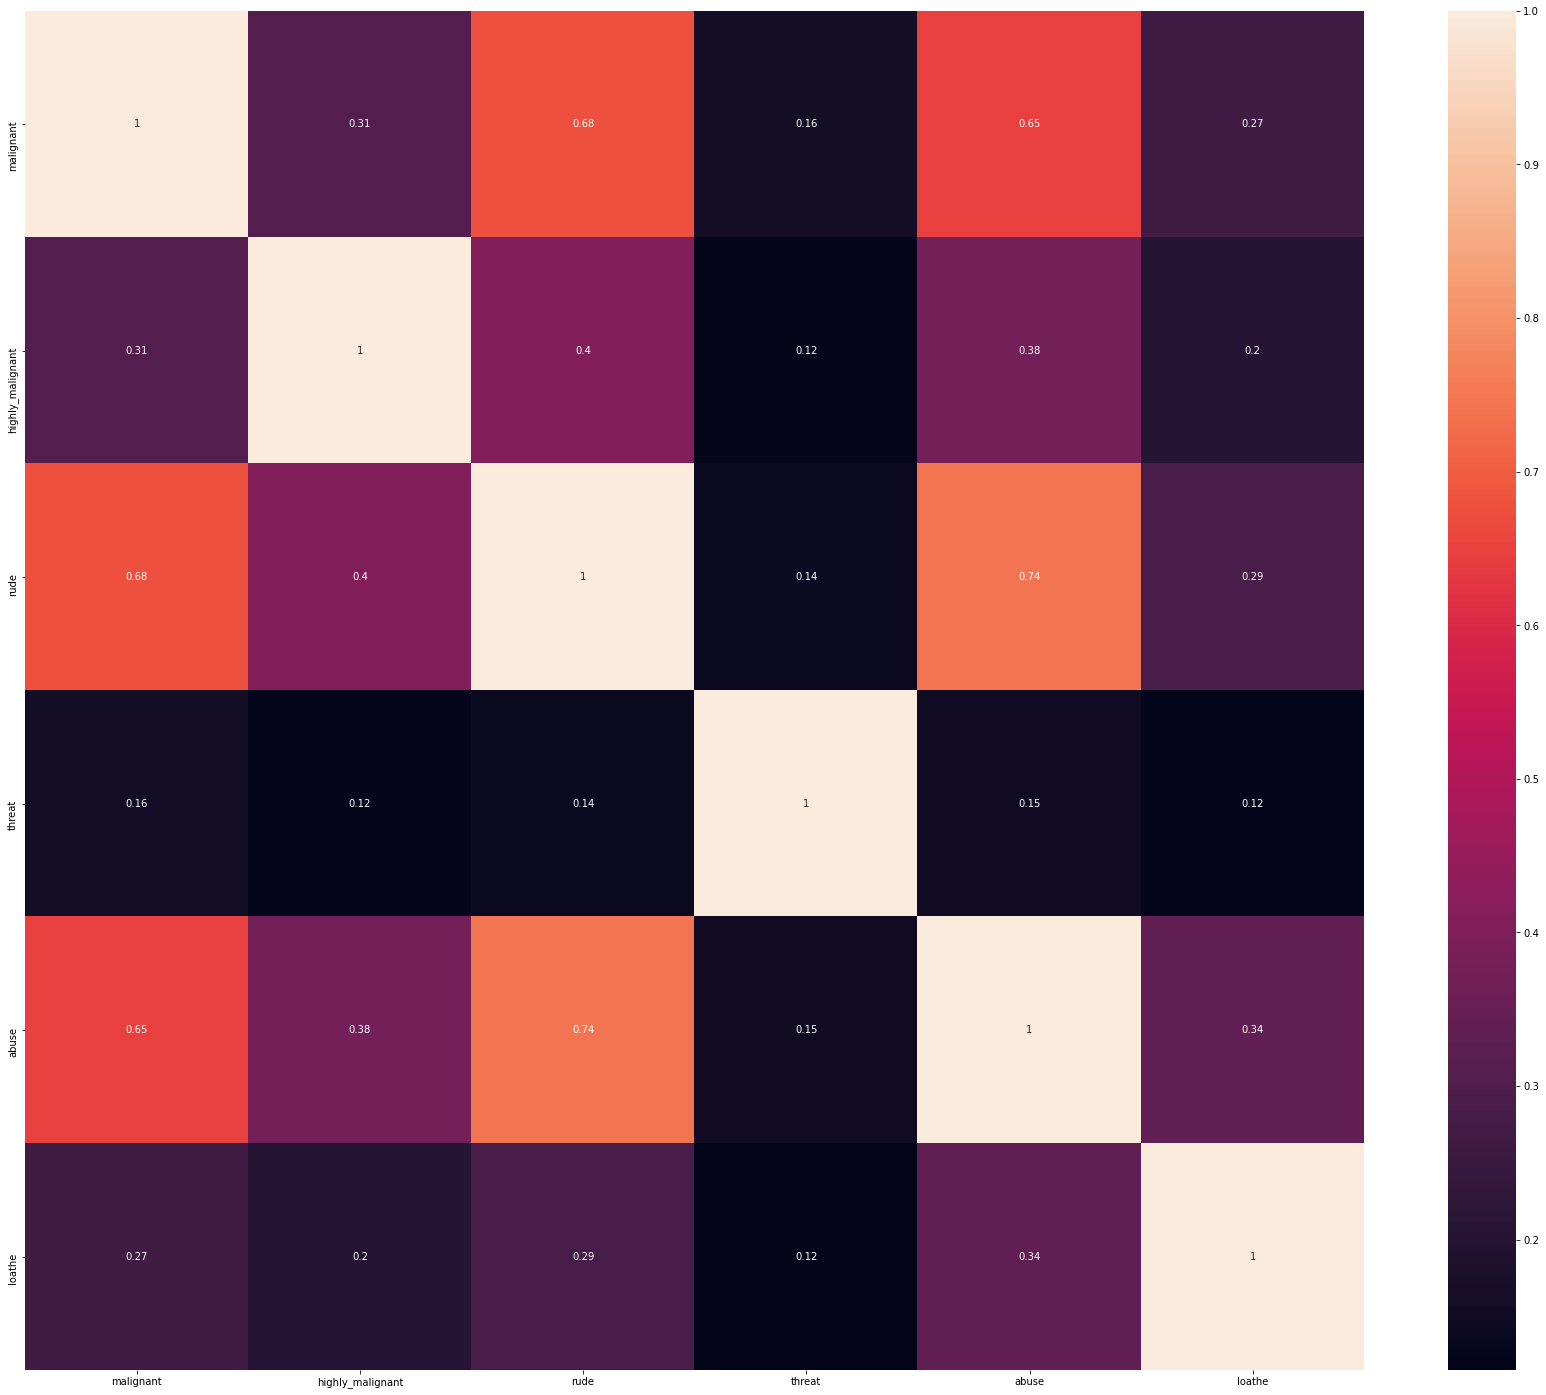

In [14]:
#checking the co-relation of all column to each other
df_cor = df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df_cor,annot=True)
plt.plot()

In [16]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

#### Comment text columns contains the information of all the comments in the features variable.

In [18]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

#### I have import nltk that is Natural Language Toolkit which help me to inbuilt all the libraries in one go.

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Sunil
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
import nltk
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
print(stops)

{'but', 'each', 'wouldn', 'themselves', 'no', 'hasn', 'being', 'o', 'when', 'are', 'those', 'shan', 'all', 'needn', 'at', 'from', "shouldn't", 'what', 'during', "you're", "isn't", 'it', "mustn't", "weren't", 'while', 'his', "you'd", 'him', 'your', 't', 'didn', 'ain', 'whom', 'where', 'both', 'above', "hasn't", 'to', 'you', 's', 'her', "wouldn't", 'doing', 'll', 'about', 'ours', 'after', 'then', 'there', "couldn't", 'shouldn', 'hers', 'under', 'won', 'nor', 'into', 'here', 'before', 'the', 'an', 'will', 'has', 'until', 'by', 'off', 'more', 'so', 'me', 'with', 'we', 'was', 'again', 'same', 'for', 'myself', 'than', "you'll", 'y', 'them', 'just', "she's", "won't", 'should', 'hadn', 'most', 'aren', 'which', "hadn't", 'yours', 'does', 'of', 'wasn', 'and', 'any', 'mightn', 'he', 'between', 'itself', 'few', 'who', "haven't", 'is', 'm', "didn't", 'doesn', 've', 'why', 'up', 'that', 'because', 'she', 'theirs', 'their', 'do', 'mustn', 'some', 'did', 'been', 'having', 'i', 'now', 'these', "that'll

#### I have import stopwards that help me to identify all the common words which i can remove it fom comments columns.

### Lemmatization

In [23]:
from nltk.stem import WordNetLemmatizer

#### Lemmatization is the process of converting a word to its base form. 
#### The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

### Stemming

In [25]:
from nltk.stem.porter import PorterStemmer

#### Stemming is a technique used to extract the base form of the words by removing affixes from them. It is just like cutting down the branches of a tree to its stems.

### Regular expressions

In [27]:
import re

#### Regular expressions are typically used in applications that involve a lot of text processing. 
#### For example, they are commonly used as search patterns in text editing programs used by developers, including vi, emacs, and modern IDEs.

### PorterStemmer

In [29]:
comment_text = ["comment_text"]

In [30]:
ps = PorterStemmer()
wordnet=WordNetLemmatizer()
sentences = nltk.sent_tokenize(df['comment_text'][0])
corpus = []
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

#### I have used the PorterStemmer and WordNetLemmatizer in comment text columns so that i can minimize the numbers of words from the columns and get some meaningful information out of it.
#### It will also help us to improve the accuracy score. 

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 159571)
X = cv.fit_transform(corpus).toarray()

#### I have Created the Bag of Words model for model prediction. This will convert the words into numbers.

In [34]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()

#### Tf-idf can be successfully used for stop-words filtering in various subject fields including text summarization and classification.

# Machine Learning

In [36]:
labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

#### I have put all the labels in dictionary for model buildings.

# Model Building

In [38]:
train, test = train_test_split(df, test_size=0.33, random_state=42, shuffle=True)

#### I have used 33% for testing and 67% for training purpose.

In [40]:
train.shape, test.shape

((106912, 8), (52659, 8))

#### There are 106912 rows and 7 columns will be used for training purpose and remaining 52659 rows and 7 columns will be used for testing purpose.

In [42]:
X_train = train['comment_text']
X_test = test['comment_text']

In [43]:
accuracies = [[],[],[]]

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
cvec = CountVectorizer()
tvec = TfidfTransformer()
model1 = MultinomialNB()

In [45]:
X_train = tvec.fit_transform(cvec.fit_transform(X_train))
X_test = tvec.transform(cvec.transform(X_test))

## Multinomial Naive Bayes

#### Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). 
#### The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article. 
#### It calculates the probability of each tag for a given sample and then gives the tag with the highest probability as output.
#### Naive Bayes is a powerful algorithm that is used for text data analysis and with problems with multiple classes. To understand Naive Bayes theorem’s working, it is important to understand the Bayes theorem concept

In [46]:
for category in labels:
    model1.fit(X_train, train[category])
    accuracy = model1.score(X_test, test[category])
    accuracies[0].append(accuracy)
    print("Accuracy For {0} Class Is {1}%".format(category,round(accuracy*100,2)))

Accuracy For malignant Class Is 91.67%
Accuracy For highly_malignant Class Is 99.0%
Accuracy For rude Class Is 95.02%
Accuracy For threat Class Is 99.71%
Accuracy For abuse Class Is 95.13%
Accuracy For loathe Class Is 99.1%


## Linear Support Vector Classifier

#### Linear Support Vector Classifier is a supervised machine learning algorithm which can be used for classification problemns.
#### It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.
#### The algorithm creates a line or a hyperplane which separates the data into classes.

In [47]:
from sklearn.svm import LinearSVC
model2 = LinearSVC()
for category in labels:
    model2.fit(X_train, train[category])
    accuracy = model2.score(X_test, test[category])
    accuracies[1].append(accuracy)
    print("Accuracy For {0} Class Is {1}%".format(category,round(accuracy*100,2)))

Accuracy For malignant Class Is 96.15%
Accuracy For highly_malignant Class Is 99.07%
Accuracy For rude Class Is 97.9%
Accuracy For threat Class Is 99.75%
Accuracy For abuse Class Is 97.19%
Accuracy For loathe Class Is 99.21%


## Logistic Regression

#### Logistic regression is basically a supervised classification algorithm.
#### Logistic Regression is a classification technique used in machine learning. 
#### It uses a logistic function to model the dependent variable.

In [48]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression(n_jobs=1, solver='liblinear')
for category in labels:
    model3.fit(X_train, train[category])
    accuracy = model3.score(X_test, test[category])
    accuracies[2].append(accuracy)
    print("Accuracy For {0} Class Is {1}%".format(category,round(accuracy*100,2)))

Accuracy For malignant Class Is 95.62%
Accuracy For highly_malignant Class Is 99.1%
Accuracy For rude Class Is 97.57%
Accuracy For threat Class Is 99.73%
Accuracy For abuse Class Is 96.98%
Accuracy For loathe Class Is 99.17%


#### I can say that all the 3 models prediction is almost same with minor accuracy difference.

In [53]:
for i in range(3):
    print("Model -",i+1,"... Aggregate Accuracy -",np.mean(accuracies.iloc[i,:]))

Model - 1 ... Aggregate Accuracy - 0.9660773403723327
Model - 2 ... Aggregate Accuracy - 0.9821049899668939
Model - 3 ... Aggregate Accuracy - 0.9802945998468132


#### I have used 3 model for model prediction and after doing the aggregate the best model accuracy is 98.21% that is Linear Support Vector Classifier.

## Saving the Best Model

In [55]:
import pickle

In [56]:
filename = 'finalized_model.pickle'
pickle.dump(model2,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

## Conclusion

#### I have managed out how to prepare a model that gives users for a novel best approach at future lodging value predictions.
#### I have train dataset from which I had to extract information.
#### I had used pandas library to read the Dataset which provide me to explore & visualize the Data properly based on Rows & Columns.
#### I did exploratory data analysis on main data frame and tried to see all visualizations.
#### Based on visualization knowledge, I use various EDA TECHNIQUES to plot the count plot.
#### After from all these I split the Features & Labels into 2 parts.
#### On this data, I have applied our machine learning classification models such as Logistic regression, Linear Support Vector Classifier and Multinomial Naive Bayes train dataset.
#### After which I found Linear Support Vector Classifier has the High accuracy score(98.21%) and best among all the regressor models.
